In [1]:
from pythtb import * # import TB model class
import matplotlib.pyplot as plt

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 2
r-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ]
 #  1  ===>  [     0.0 ,     1.0 ]
positions of orbitals:
 #  0  ===>  [     0.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,     0.5 ]
site energies:
 #  0  ===>      -2.0
 #  1  ===>       2.0
hoppings:
<  0 | H |  0 + [  1 ,  0 ] >     ===>     -1.0 +     0.0 i
<  0 | H |  0 + [  0 ,  1 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  1 + [  1 ,  0 ] >     ===>      1.0 +     0.0 i
<  1 | H |  1 + [  0 ,  1 ] >     ===>      1.0 +     0.0 i
<  1 | H |  0 + [  1 ,  1 ] >     ===>      0.4 +     0.0 i
<  1 | H |  0 + [  0 ,  1 ] >     ===>      0.0 +     0.4 i
<  1 | H |  0 + [  0 ,  0 ] >     ===>     -0.4 +     0.0 i
<  1 | H |  0 + [  1 ,  

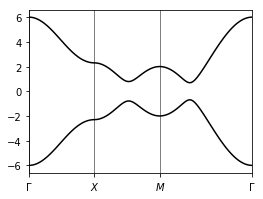

In [11]:
lat=[[1.0, 0.0], [0.0, 1.0]]
orb=[[0.0, 0.0], [0.5, 0.5]]
my_model = tbmodel(2, 2, lat, orb)
# set model
Delta = 2.0
t_0 = 1.0
tprime = 0.4
my_model.set_sites([-Delta,Delta])
my_model.add_hop(-t_0, 0, 0, [ 1, 0])
my_model.add_hop(-t_0, 0, 0, [ 0, 1])
my_model.add_hop( t_0, 1, 1, [ 1, 0])
my_model.add_hop( t_0, 1, 1, [ 0, 1])
my_model.add_hop( tprime , 1, 0, [ 1, 1])
my_model.add_hop( tprime*1j, 1, 0, [ 0, 1])
my_model.add_hop(-tprime , 1, 0, [ 0, 0])
my_model.add_hop(-tprime*1j, 1, 0, [ 1, 0])
my_model.display()
# generate k-point path and labels and solve Hamiltonian
path=[[0.0,0.0],[0.0,0.5],[0.5,0.5],[0.0,0.0]]
k_lab=(r'$\Gamma $',r'$X$', r'$M$', r'$\Gamma$')
(k_vec,k_dist,k_node)=my_model.k_path(path,121)
evals=my_model.solve_all(k_vec)
# plot band structure
fig, ax = plt.subplots(figsize=(4.,3.))
ax.set_xlim([0,k_node[-1]])
ax.set_xticks(k_node)
ax.set_xticklabels(k_lab)

for n in range(len(k_node)):
    ax.axvline(x=k_node[n], linewidth=0.5, color='k')
    
ax.plot(k_dist,evals[0],color='k')
ax.plot(k_dist,evals[1],color='k')